In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

import statistics
import os 
import json

folder_figures = 'figures'

In [2]:
# Results from true tops
fp_nbthermo = 'data/NbThermo_database.json'

with open(fp_nbthermo) as json_file:
    list_nbthermo = json.load(json_file)

exp_meths = ['nanoDSF', 'DSF (SYPRO)', 'DSC', 'Other', 'Circular dichroism']

dict_id_multiple_exp_meth_per_id = dict()

for dict_info in list_nbthermo:
    nb = dict_info['id']
    id = f'NbThermo.{nb}'
    Tms = []
    for exp_meth in exp_meths:
        tm = dict_info['Tm'][exp_meth]['value']
        if tm:
            Tms.append(tm)
    if len(Tms) > 1:
        dict_id_multiple_exp_meth_per_id[id] = Tms
    elif len(Tms) ==0 :
        print('No TM: ', id)
    if not dict_info['Sequence']['Aho']['value']:
        print('No seq: ', id)
    


list_nbthermo_id_of_patrick = [f'NbThermo.000{i}' for i in range(45,100)] + [f'NbThermo.00{i}' for i in range(112)]
dict_id_multiple_exp_meth_per_id_no_pat = {key: dict_id_multiple_exp_meth_per_id[key] for key in dict_id_multiple_exp_meth_per_id if key not in list_nbthermo_id_of_patrick}

stdev = [statistics.stdev(tms) for tms in dict_id_multiple_exp_meth_per_id_no_pat.values()]
rmse_multi_exp = np.mean(stdev)
print(f'{len(dict_id_multiple_exp_meth_per_id_no_pat)} entries of NbThermo have multiple Tms from multiple experiemtnal methods (Patrick data was removed)')
print(f'Averaged STEDV is {rmse_multi_exp}.')
print([(list(dict_id_multiple_exp_meth_per_id_no_pat.keys())[i], i, stdev[i]) for i in range(len(stdev)) if stdev[i]>4])
print(dict_id_multiple_exp_meth_per_id)


No TM:  NbThermo.00157
No TM:  NbThermo.00485
No TM:  NbThermo.00486
No TM:  NbThermo.00487
No TM:  NbThermo.00488
No seq:  NbThermo.00520
No seq:  NbThermo.00521
No seq:  NbThermo.00522
No seq:  NbThermo.00523
No seq:  NbThermo.00524
No seq:  NbThermo.00525
No seq:  NbThermo.00526
No TM:  NbThermo.00527
No seq:  NbThermo.00527
No seq:  NbThermo.00528
No seq:  NbThermo.00529
No TM:  NbThermo.00530
No seq:  NbThermo.00530
No seq:  NbThermo.00531
No seq:  NbThermo.00532
No seq:  NbThermo.00533
No seq:  NbThermo.00534
No seq:  NbThermo.00535
No seq:  NbThermo.00536
No TM:  NbThermo.00537
No seq:  NbThermo.00537
No TM:  NbThermo.00538
No seq:  NbThermo.00538
No seq:  NbThermo.00539
No seq:  NbThermo.00540
No seq:  NbThermo.00541
No seq:  NbThermo.00542
No seq:  NbThermo.00543
No seq:  NbThermo.00544
No seq:  NbThermo.00545
No seq:  NbThermo.00546
No seq:  NbThermo.00547
No seq:  NbThermo.00548
56 entries of NbThermo have multiple Tms from multiple experiemtnal methods (Patrick data was rem

In [3]:
# Plus upon alignement 
list_ids_internaldup_upon_al = ['NbThermo.00130/NbThermo.00116', 'NbThermo.00342/NbThermo.00331',
                                'NbThermo.00343/NbThermo.00332', 'NbThermo.00344/NbThermo.00333',
                                'NbThermo.00345/NbThermo.00334', 'NbThermo.00346/NbThermo.00335',
                                'NbThermo.00347/NbThermo.00336', 'NbThermo.00348/NbThermo.00337',
                                'NbThermo.00349/NbThermo.00338', 'NbThermo.00350/NbThermo.00339',
                                'NbThermo.00351/NbThermo.00340', 'NbThermo.00428/NbThermo.00357',
                                'NbThermo.00430/NbThermo.00429', 'NbThermo.00433/NbThermo.00432',
                                'NbThermo.00476/NbThermo.00475', 'NbThermo.00002/NbThermo.00001',
                                'NbThermo.00004/NbThermo.00003', 'NbThermo.00006/NbThermo.00005'] 

dict_internal_duplicates = dict()

for id_inter in list_ids_internaldup_upon_al:
    Tms = list()
    for uid in id_inter.split('/'):
        for dict_info in list_nbthermo:
            nb = dict_info['id']
            id = f'NbThermo.{nb}'
            if id==uid:
                sub_Tms = []
                for exp_meth in exp_meths:
                    tm = dict_info['Tm'][exp_meth]['value']
                    if tm:
                        sub_Tms.append(tm)
                Tms.extend(sub_Tms)
            
    dict_internal_duplicates[id_inter] = Tms

stdev = [statistics.stdev(tms) for tms in dict_internal_duplicates.values()]
rmse_internal_dupli = np.mean(stdev)
print(f'{len(dict_internal_duplicates)} entries of NbThermo have internal duplicates')
print(f'Averaged STEDV is {rmse_internal_dupli}.')
print([(list(dict_internal_duplicates.keys())[i], i, stdev[i]) for i in range(len(stdev)) if stdev[i]>4])
print(stdev)

18 entries of NbThermo have internal duplicates
Averaged STEDV is 1.2467472881600627.
[('NbThermo.00351/NbThermo.00340', 10, 4.242640687119285)]
[2.616295090390228, 0.7071067811865476, 1.4142135623730951, 0.7071067811865476, 0.0, 0.7071067811865476, 1.4142135623730951, 0.7071067811865476, 1.4142135623730951, 0.7071067811865476, 4.242640687119285, 0.9574271077563381, 0.5773502691896257, 2.3804761428476167, 0.7071067811865476, 1.7677669529663689, 0.0, 1.4142135623730951]


In [4]:
list_dupli_own_source = ['NbThermo.00009/40.P1T', 'NbThermo.00010/34.P2',
                                'NbThermo.00012/44.T2T', 'NbThermo.00013/35.C1',
                                'NbThermo.00014/43.C2T', 'NbThermo.00037/6RL7',
                                'NbThermo.00028/7JVB', 'NbThermo.00133/NbThermo.00113/3DWT',
                                'NbThermo.00112/1JTO', 'NbThermo.00231/4Z9K', 
                                'NbThermo.00038/NbThermo.00144/NbThermo.00279/17.aGFP',
                                'NbThermo.00141/NbThermo.00149/1.1yc7',
                                'NbThermo.00372/2.4u05', 'NbThermo.00491/1BZQ'] 

dataset_own_source = {'40.P1T': 82.41, '34.P2': 78.34, '44.T2T': 78.38, 
                      '35.C1': 77.06, '43.C2T': 78.69, '6RL7': 72.09, 
                      '7JVB': 72.91, '3DWT': 77.72, '1JTO': 67.01, 
                      '4Z9K': 73.49, '17.aGFP': 67.64, '1.1yc7':70.94, 
                      '2.4u05':83.44, '1BZQ': 70.11}



dict_dupli_own_source = dict()

for id_inter in list_dupli_own_source:
    Tms = list()
    for uid in id_inter.split('/'):
        found_nbthermo = False
        for dict_info in list_nbthermo:
            nb = dict_info['id']
            id = f'NbThermo.{nb}'
            if id==uid:
                found_nbthermo = True
                sub_Tms = []
                for exp_meth in exp_meths:
                    tm = dict_info['Tm'][exp_meth]['value']
                    if tm:
                        sub_Tms.append(tm)
                Tms.extend(sub_Tms)
        if not found_nbthermo:
            Tms.extend([dataset_own_source[uid]])
    dict_dupli_own_source[id_inter] = Tms

stedv = [statistics.stdev(tms) for tms in dict_dupli_own_source.values()]
rmse_dupli_own = np.mean(stedv)
print(f'{len(dict_dupli_own_source)} entries of NbThermo have duplicates wiht our own dataset')
print(f'Averaged STEDV is {rmse_dupli_own}.')
stedv
print(dict_dupli_own_source['NbThermo.00038/NbThermo.00144/NbThermo.00279/17.aGFP'])

14 entries of NbThermo have duplicates wiht our own dataset
Averaged STEDV is 3.025584404839435.
[46.9, 69.5, 39, 67.64]


In [5]:
final_dict_with_all = dict()

list_dupli_with_multi_exp_and_internal = ['NbThermo.00428','NbThermo.00357','NbThermo.00430','NbThermo.00429','NbThermo.00433','NbThermo.00432']

# Add  multi exps
c = 0
for id in dict_id_multiple_exp_meth_per_id_no_pat:
    if id not in list_dupli_with_multi_exp_and_internal:
        final_dict_with_all[id] = dict_id_multiple_exp_meth_per_id_no_pat[id]
        c+=1 
print('Tot multi exp: ', c)

# Add internal duplicates
c = 0
for id in dict_internal_duplicates:
    final_dict_with_all[id] = dict_internal_duplicates[id]
    c+=1 
print('Totinternal duplicates: ', c)

# Add external duplicates 
c = 0
for id in dict_dupli_own_source:
    final_dict_with_all[id] = dict_dupli_own_source[id]   
    c+=1 
print('Tot duplicate with our dataset: ', c)

print(final_dict_with_all)


Tot multi exp:  50
Totinternal duplicates:  18
Tot duplicate with our dataset:  14
{'NbThermo.00355': [55, 59], 'NbThermo.00356': [71, 74], 'NbThermo.00358': [55, 60], 'NbThermo.00359': [47, 47], 'NbThermo.00360': [70, 72], 'NbThermo.00361': [72, 73], 'NbThermo.00363': [71, 72], 'NbThermo.00364': [63, 65], 'NbThermo.00406': [62, 66], 'NbThermo.00407': [60, 60], 'NbThermo.00408': [60, 62], 'NbThermo.00409': [57, 58], 'NbThermo.00410': [61, 64], 'NbThermo.00411': [80, 81], 'NbThermo.00412': [56, 56], 'NbThermo.00423': [81, 78], 'NbThermo.00424': [81, 78], 'NbThermo.00425': [86, 85], 'NbThermo.00426': [87, 90], 'NbThermo.00427': [85, 87], 'NbThermo.00431': [76, 82], 'NbThermo.00446': [71, 74], 'NbThermo.00447': [73, 76], 'NbThermo.00448': [86, 87], 'NbThermo.00449': [60, 57], 'NbThermo.00450': [66, 67], 'NbThermo.00451': [75, 76], 'NbThermo.00453': [58, 60], 'NbThermo.00454': [74, 76], 'NbThermo.00455': [55, 58], 'NbThermo.00456': [53, 57], 'NbThermo.00457': [65, 65], 'NbThermo.00458': [5

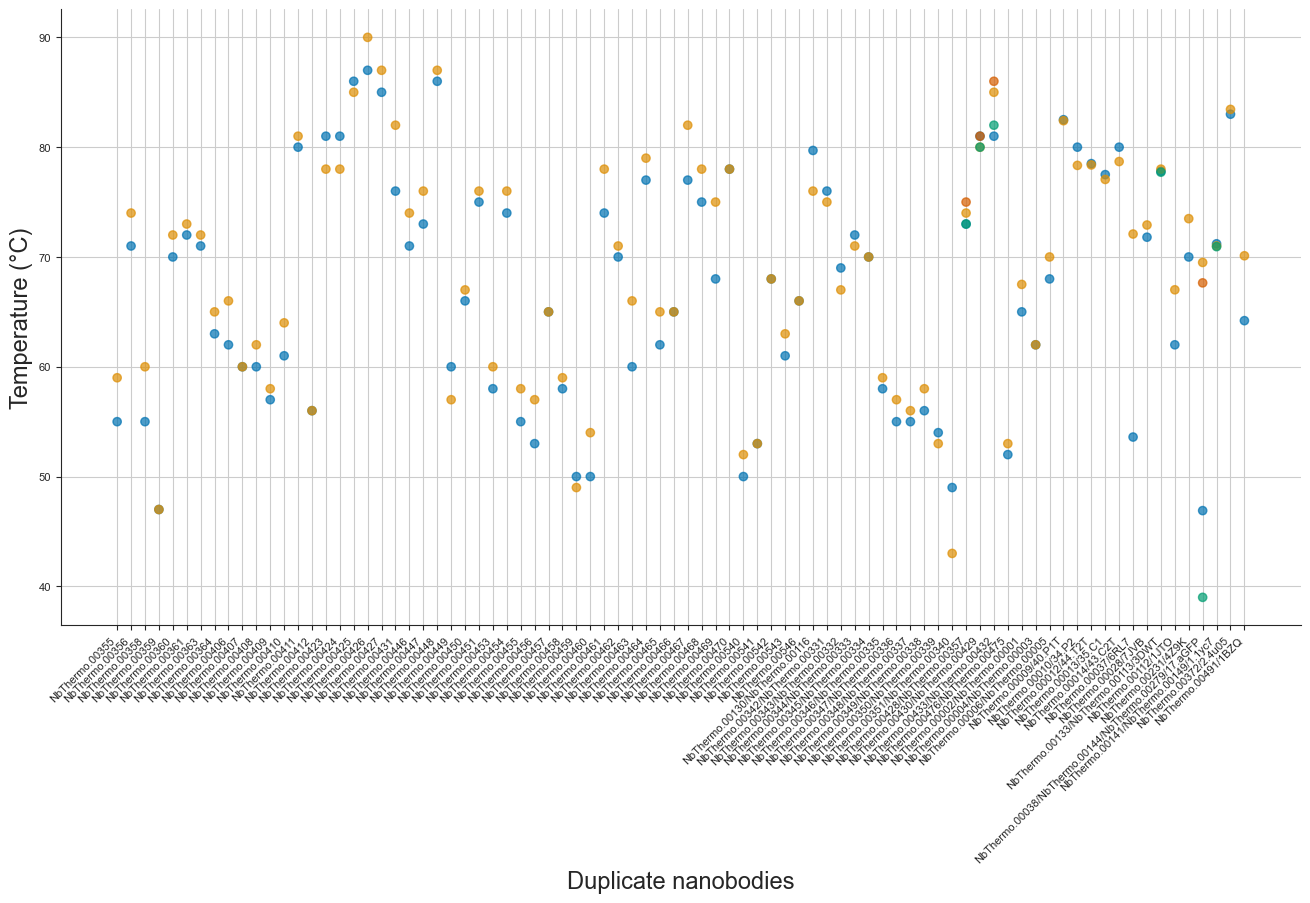

In [6]:
from itertools import combinations
def mean_absolute_pairwise_error(values):
    n = len(values)
    if n < 2:
        return 0  # If there's only one value or none, the error is zero
    
    pairwise_errors = [abs(a - b) for a, b in combinations(values, 2)]
    mape = sum(pairwise_errors) / len(pairwise_errors)
    
    return mape

sns.set_style('white', {'axes.spines.right':False, 'axes.spines.top': False,
                    'xtick.bottom': True, 'ytick.left': True})
fig, ax = plt.subplots()
fig.set_size_inches(16,8)

palette = sns.color_palette("colorblind")

for key, values in final_dict_with_all.items():
    x = [key] * len(values)
    plt.scatter(x, values, color=palette[:len(values)], alpha=0.7)

plt.xlabel('Duplicate nanobodies', fontsize=17)
plt.ylabel('Temperature (°C)', fontsize=17)

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(bottom=True, left=True, labelsize=8)

plt.grid(True)


plt.savefig(os.path.join('figures', f'figureS7a.png'), dpi=800, bbox_inches='tight', transparent=True)




Averaged MAPE on all is 2.4289024390243905.
82


/var/folders/hr/1j50v5r91sv8fs_r8qhx8bym0000gn/T/ipykernel_9367/3701228786.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(final_dict_with_all.keys())


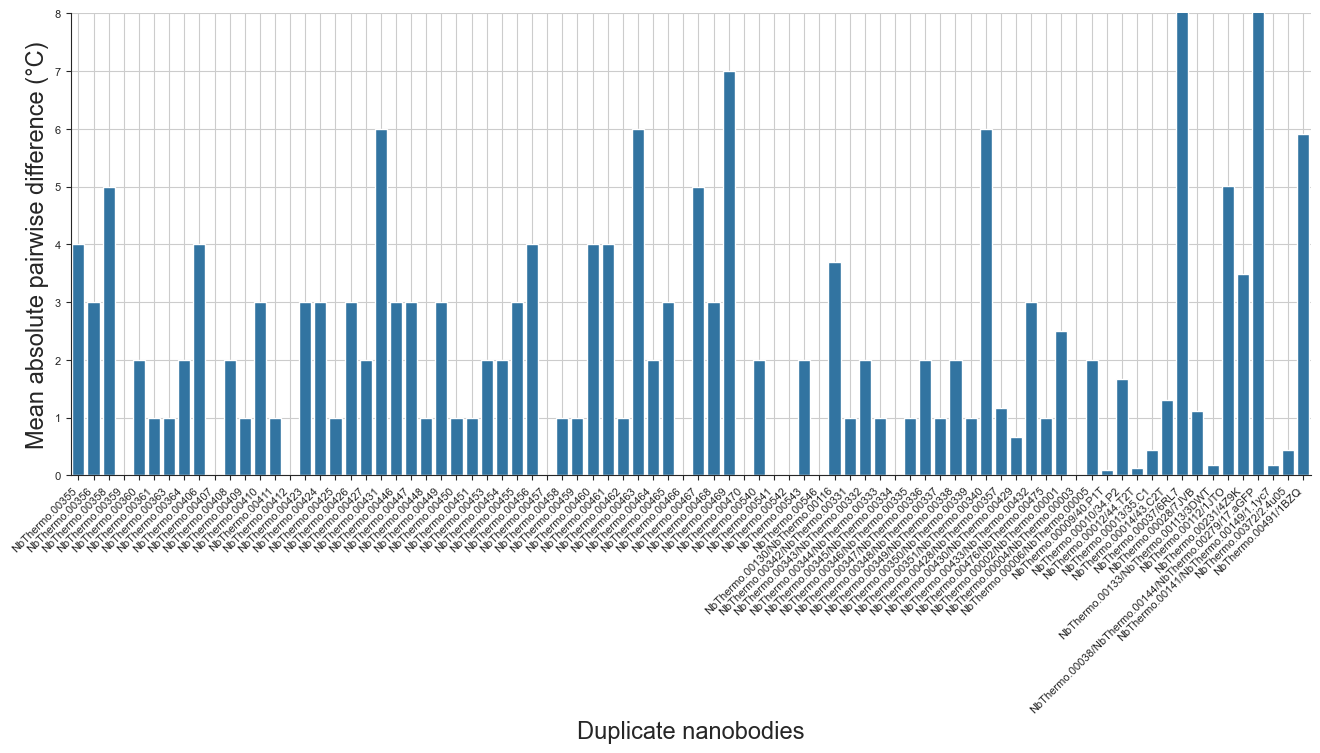

In [7]:
mape = [mean_absolute_pairwise_error(tms) for tms in final_dict_with_all.values()]
rmse_dupli_all = np.mean(mape)
print(f'Averaged MAPE on all is {rmse_dupli_all}.')
print(len(final_dict_with_all))

sns.set_style('white', {'axes.spines.right':False, 'axes.spines.top': False,
                    'xtick.bottom': True, 'ytick.left': True})
fig, ax = plt.subplots()
fig.set_size_inches(16,6)

palette = sns.color_palette("colorblind")


sns.barplot({'idx':range(0,len(mape)), 'mape': mape}, x="idx", y="mape")

plt.xlabel('Duplicate nanobodies', fontsize=17)
plt.ylabel('Mean absolute pairwise difference (°C)', fontsize=17)

ax.set_xticklabels(final_dict_with_all.keys())
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(bottom=True, left=True, labelsize=8)

plt.grid(True)
plt.ylim(0,8)

plt.savefig(os.path.join('figures', f'figuresb.png'), dpi=800, bbox_inches='tight', transparent=True)